# Project (from 10.16 above)

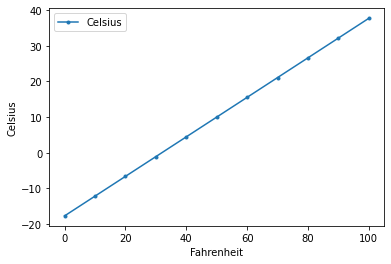

In [1]:
# Follow the instructions to launch IPython with Matplotlib support
c = lambda f: 5/9 * (f-32)
temps = [(f, c(f)) for f in range(0, 101, 10)]

import pandas as pd

# Use pandas DataFrames to plot Celsius vs Fahrenheit 
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')
y_label = axes.set_ylabel('Celsius')

In [2]:
# Refresh your understanding of the equation for a line (y=mx +b)
# Follow the instructions to load NY City January high temperature from a csv file into a DataFrame.
nyc = pd.read_csv('C:/Users/mandi/OneDrive/Documents/NWMSU/44-608/introtopython/examples/ch10/ave_hi_nyc_jan_1895-2018.csv')

# Follow the instructions to view head and tail of the file. 
print("Head:")
print(nyc.head())
print()
print("Tail:")
print(nyc.tail())

Head:
     Date  Value  Anomaly
0  189501   34.2     -3.2
1  189601   34.7     -2.7
2  189701   35.5     -1.9
3  189801   39.6      2.2
4  189901   36.4     -1.0

Tail:
       Date  Value  Anomaly
119  201401   35.5     -1.9
120  201501   36.1     -1.3
121  201601   40.8      3.4
122  201701   42.8      5.4
123  201801   38.7      1.3


In [3]:
# Follow the instructions to clean the data.
nyc.columns = ['Date', 'Temperature', 'Anomaly']
print(nyc.head(3))

print()
print("Data type: ", nyc.Date.dtype)

print()
nyc.Date = nyc.Date.floordiv(100)
print(nyc.head(3))

     Date  Temperature  Anomaly
0  189501         34.2     -3.2
1  189601         34.7     -2.7
2  189701         35.5     -1.9

Data type:  int64

   Date  Temperature  Anomaly
0  1895         34.2     -3.2
1  1896         34.7     -2.7
2  1897         35.5     -1.9


In [4]:
# Use describe to calculate basic descriptive statistics for the dataset. 
pd.set_option('precision', 2)
nyc.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

In [5]:
# Use the SciPy stats module linregress function to calculate slope and intercept for the best fit line through the data.
from scipy import stats
linear_regression = stats.linregress(x=nyc.Date, 
                                     y=nyc.Temperature)
print("Slope:", linear_regression.slope)
print("Intercept:", linear_regression.intercept)

Slope: 0.014771361132966163
Intercept: 8.694993233674289


(10.0, 70.0)

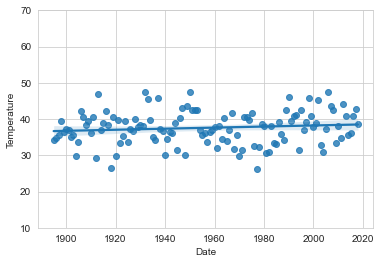

In [11]:
import seaborn as sns

sns.set_style('whitegrid')
axes = sns.regplot(x=nyc.Date, y=nyc.Temperature)
axes.set_ylim(10, 70)

In [6]:
# Use your results to predict the max Jan temperature in 2021. 
jan_2019 = linear_regression.slope * 2019 + linear_regression.intercept
print("NYC Max Avg Temp Prediction for Jan 2019 (F):", jan_2019 )

jan_2021 = linear_regression.slope * 2021 + linear_regression.intercept
print("NYC Max Avg Temp Prediction for Jan 2021 (F):", jan_2021 )

NYC Max Avg Temp Prediction for Jan 2019 (F): 38.51837136113297
NYC Max Avg Temp Prediction for Jan 2021 (F): 38.54791408339891


In [7]:
# amanda hanway